In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [95]:
df=pd.read_csv("loan_approval_data.csv")
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [96]:
df["Loan_Approved"].unique()

array(['No', 'Yes', nan], dtype=object)

In [97]:
df.shape

(1000, 20)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [99]:
df.dropna(subset=["Loan_Approved"],inplace=True)
df.shape

(950, 20)

In [100]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,902.000000,902.000000,902.000000,902.000000,903.000000,902.000000,901.000000,903.000000,901.000000,901.000000,903.000000,902.000000
mean,498.529933,10847.016630,5061.607539,40.044346,1.460687,675.111973,1.948946,0.347187,9966.298557,24701.875694,20455.895903,48.000000
std,290.651274,5064.213641,2937.413855,11.194488,1.103489,71.327228,1.406197,0.144522,5859.624544,14328.907796,11511.440627,24.258321
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,73.000000,36.000000,1015.000000,12.000000
25%,243.250000,6742.000000,2469.750000,31.000000,1.000000,616.000000,1.000000,0.220000,4761.000000,12634.000000,9772.500000,24.000000
50%,497.500000,10452.500000,5143.000000,40.000000,1.000000,677.000000,2.000000,0.340000,9910.000000,24059.000000,21282.000000,48.000000
75%,752.750000,15174.250000,7589.750000,49.000000,2.000000,735.000000,3.000000,0.480000,15052.000000,36843.000000,30138.500000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [101]:
le=LabelEncoder()
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])

X=df.drop(columns=["Loan_Approved","Applicant_ID"],axis=1)
y=df["Loan_Approved"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int32

In [ ]:
# viewing 

In [102]:
X[X["Applicant_Income"].isna()].head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category
43,NaN,3629.0,Salaried,38.0,Married,1.0,707.0,0.0,0.20,10415.0,32314.0,13941.0,36.0,Home,Urban,Graduate,Male,Business
55,NaN,7679.0,Contract,22.0,Single,3.0,679.0,4.0,0.14,4695.0,29877.0,26058.0,48.0,Personal,Rural,Graduate,Male,Private
80,NaN,2343.0,Salaried,44.0,Single,0.0,690.0,0.0,0.31,NaN,15858.0,5830.0,84.0,Business,Rural,Not Graduate,Male,Private
98,NaN,NaN,Salaried,49.0,Married,1.0,NaN,4.0,0.13,19425.0,18171.0,10862.0,NaN,Personal,Urban,Graduate,Female,Business
194,NaN,6467.0,Salaried,45.0,Married,0.0,764.0,0.0,0.16,8007.0,8744.0,21293.0,NaN,Home,NaN,Graduate,Male,Business


In [103]:
X.Loan_Purpose.unique()

array(['Personal', 'Car', nan, 'Business', 'Home', 'Education'],
      dtype=object)

In [104]:
df[df["Loan_Purpose"].isna()].head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,1
14,15.0,4433.0,5877.0,Contract,58.0,Single,0.0,713.0,4.0,0.57,1074.0,NaN,19452.0,84.0,NaN,Semiurban,NaN,Male,MNC,0
22,23.0,2189.0,6981.0,Salaried,23.0,Married,3.0,696.0,0.0,0.49,17430.0,38596.0,12805.0,84.0,NaN,Urban,Graduate,Male,Government,0
75,76.0,4027.0,481.0,Salaried,56.0,Married,1.0,737.0,2.0,0.29,11109.0,36486.0,30119.0,36.0,NaN,Urban,Not Graduate,Male,Private,0
84,85.0,5561.0,60.0,Salaried,42.0,Married,3.0,601.0,3.0,0.29,15471.0,48700.0,33692.0,36.0,NaN,Semiurban,Not Graduate,Male,Private,0


<Axes: xlabel='Loan_Purpose', ylabel='Loan_Approved'>

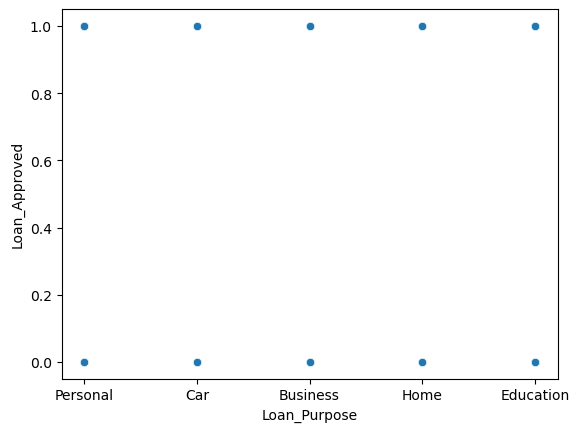

In [105]:
sns.scatterplot(x=df["Loan_Purpose"],y=y)

In [106]:
df["Loan_Approved"].unique()

array([0, 1])